In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
%cd 'credit_card_fraud'
os.getcwd()

/content/drive/My Drive/Colab Notebooks/credit_card_fraud


'/content/drive/My Drive/Colab Notebooks/credit_card_fraud'

In [ ]:
ls

credit_card.csv     machine_learning_india_ai_challenge-dataset.zip  TEST.csv
credit_card.gsheet  sample_submission.csv                            TRAIN.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.combine import SMOTETomek
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv('TRAIN.csv')

In [ ]:
data.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [ ]:
data.tail()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284450,284450,1.216221,0.095995,0.666817,1.850616,-0.516269,-0.267296,-0.183114,-0.104976,-1.985790,1.442988,-0.153159,0.143619,0.923098,0.095348,0.439161,-1.330980,0.021354,0.416465,-2.256853,-0.528517,-0.286826,-0.347838,0.072935,0.367923,0.358108,0.044019,0.027223,0.028017,19.46,0
284451,284451,1.429502,-0.990271,-0.224429,-1.808740,0.770788,3.730989,-1.914212,1.036385,-0.316971,0.646103,-0.100190,-0.751095,0.437456,-0.504131,1.491844,2.024039,-0.554936,-0.204874,0.477147,0.206332,0.376136,0.928723,-0.108174,1.048922,0.481214,-0.026342,0.062900,0.024639,0.02,0
284452,284452,2.041198,-0.218276,-1.405547,0.187570,0.001916,-0.781668,-0.043787,-0.090115,0.677407,0.227002,0.439484,-0.085891,-1.801888,1.007830,0.348531,0.140724,-0.729001,0.717937,0.099021,-0.348353,0.273900,0.844092,-0.023770,-0.407890,0.190140,-0.089576,-0.029237,-0.075626,1.00,0
284453,284453,1.857451,0.071823,-0.086963,3.553877,0.082026,1.245277,-0.788886,0.467363,-0.271086,1.574760,-0.443961,-0.501712,-1.357095,0.173390,-1.039803,1.643621,-1.299847,0.922837,-1.231397,-0.306389,0.170106,0.451313,0.157898,0.129330,-0.228721,0.012281,-0.003598,-0.041590,11.31,0
284454,284454,-0.684651,1.031745,0.693707,0.966796,0.297916,1.261476,-0.125550,0.887185,-0.256040,-0.156763,-0.526146,0.138975,-0.801623,0.445057,-0.456851,-0.446537,0.121772,0.532317,1.476535,0.027695,0.042087,0.333864,-0.259636,-1.304181,-0.035003,-0.099278,0.318439,0.128356,14.95,0


In [ ]:
data.shape

(284455, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284455 entries, 0 to 284454
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   284455 non-null  int64  
 1   V1      284455 non-null  float64
 2   V2      284455 non-null  float64
 3   V3      284455 non-null  float64
 4   V4      284455 non-null  float64
 5   V5      284455 non-null  float64
 6   V6      284455 non-null  float64
 7   V7      284455 non-null  float64
 8   V8      284455 non-null  float64
 9   V9      284455 non-null  float64
 10  V10     284455 non-null  float64
 11  V11     284455 non-null  float64
 12  V12     284455 non-null  float64
 13  V13     284455 non-null  float64
 14  V14     284455 non-null  float64
 15  V15     284455 non-null  float64
 16  V16     284455 non-null  float64
 17  V17     284455 non-null  float64
 18  V18     284455 non-null  float64
 19  V19     284455 non-null  float64
 20  V20     284455 non-null  float64
 21  V21     28

In [ ]:
data.drop('Index',axis=1,inplace=True)

In [ ]:
data.isnull().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000
mean,0.000779,-0.000811,0.001275,-0.000793,0.000592,0.000186,0.000951,-0.000270,0.000505,0.000948,-0.000669,0.001013,0.000120,0.001309,0.000053,0.000711,0.001262,0.000469,-0.000116,-0.000029,-0.000171,-0.000050,0.000027,0.000018,-0.000051,0.000028,-0.000037,-0.000028,88.359646,0.001547
std,1.956147,1.650234,1.510626,1.414216,1.378329,1.332161,1.232971,1.190897,1.097805,1.085083,1.018770,0.993861,0.995318,0.951702,0.915289,0.872882,0.839648,0.836807,0.813859,0.771083,0.732765,0.725495,0.624473,0.605645,0.521274,0.482243,0.403488,0.330127,250.177771,0.039299
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-13.563273,-25.162799,-9.335193,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.920117,-0.598750,-0.889749,-0.848835,-0.691343,-0.768227,-0.553788,-0.208633,-0.642669,-0.535273,-0.762625,-0.405250,-0.648393,-0.425253,-0.582798,-0.467797,-0.483632,-0.498663,-0.456281,-0.211704,-0.228434,-0.542432,-0.161861,-0.354545,-0.317194,-0.326951,-0.070845,-0.052957,5.600000,0.000000
50%,0.018330,0.065238,0.179953,-0.020206,-0.054243,-0.274172,0.040265,0.022328,-0.051183,-0.092820,-0.032963,0.140170,-0.013518,0.050731,0.048122,0.066473,-0.065577,-0.003506,0.003738,-0.062480,-0.029520,0.006675,-0.011192,0.040977,0.016461,-0.052077,0.001337,0.011238,22.000000,0.000000
75%,1.315693,0.803357,1.027332,0.742635,0.612015,0.398641,0.570515,0.327214,0.597346,0.454005,0.739251,0.618276,0.662590,0.493220,0.648842,0.523282,0.399776,0.500875,0.458768,0.133013,0.186326,0.528481,0.147659,0.439527,0.350697,0.240929,0.091023,0.078271,77.200000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
data['Class'].value_counts()

0    284015
1       440
Name: Class, dtype: int64

In [ ]:
print('Number of frauds : ', data['Class'].value_counts()[1])
print('Number of non frauds : ', data['Class'].value_counts()[0])

Number of frauds :  440
Number of non frauds :  284015


In [ ]:
corr = data.corr()
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.002475,-0.004452,0.001875,-0.003053,-0.000821,-0.004349,0.001714,-0.001686,-0.003642,0.002435,-0.004028,0.000087,-0.004417,-0.000041,-0.003780,-0.006632,-0.002592,0.000846,0.000352,0.001398,-0.000425,-0.000041,-0.000057,0.000474,-0.000088,0.000624,0.000050,-0.228112,-0.096373
V2,0.002475,1.000000,0.003680,-0.001928,0.002135,0.000729,0.003479,-0.001018,0.001442,0.003061,-0.002161,0.003690,-0.000146,0.004224,0.000009,0.003094,0.005365,0.002025,-0.000513,-0.000200,-0.001457,0.000521,-0.000129,0.000115,-0.000455,-0.000003,-0.000749,-0.000134,-0.531930,0.086505
V3,-0.004452,0.003680,1.000000,0.003698,-0.004458,-0.001599,-0.007041,0.003173,-0.003016,-0.006658,0.004822,-0.007972,0.000168,-0.008809,-0.000164,-0.006716,-0.011231,-0.004248,0.001255,0.000685,0.002047,-0.000445,-0.000018,-0.000279,0.000803,0.000235,0.001527,0.000183,-0.211714,-0.183220
V4,0.001875,-0.001928,0.003698,1.000000,0.001972,0.000889,0.003352,-0.001340,0.001905,0.003779,-0.002982,0.004896,-0.000038,0.005628,0.000181,0.003758,0.006297,0.002165,-0.000568,-0.000230,-0.000977,0.000320,-0.000036,0.000314,-0.000405,-0.000226,-0.000655,-0.000086,0.098931,0.127422
V5,-0.003053,0.002135,-0.004458,0.001972,1.000000,-0.001038,-0.004656,0.002383,-0.001656,-0.003821,0.002471,-0.004184,0.000193,-0.004301,-0.000018,-0.004057,-0.007262,-0.002845,0.000990,0.000321,0.001210,-0.000437,-0.000262,0.000047,0.000540,-0.000048,0.000769,-0.000075,-0.387002,-0.089295
V6,-0.000821,0.000729,-0.001599,0.000889,-0.001038,1.000000,-0.001043,0.001295,-0.000699,-0.001460,0.001033,-0.001859,0.000034,-0.001986,-0.000032,-0.001468,-0.002467,-0.000817,0.000282,0.000268,-0.000139,0.000100,-0.000170,0.000014,0.000232,0.000069,0.000270,0.000121,0.216139,-0.041521
V7,-0.004349,0.003479,-0.007041,0.003352,-0.004656,-0.001043,1.000000,0.001795,-0.002781,-0.006421,0.004523,-0.007444,0.000174,-0.008016,0.000030,-0.006620,-0.011309,-0.004302,0.001522,0.000296,0.002896,-0.000845,0.000304,-0.000135,0.000717,0.000117,0.001321,0.000201,0.398734,-0.180110
V8,0.001714,-0.001018,0.003173,-0.001340,0.002383,0.001295,0.001795,1.000000,0.001157,0.002433,-0.001329,0.002675,-0.000445,0.002265,-0.000039,0.002394,0.004796,0.001693,-0.000829,-0.000692,0.002831,-0.000932,0.000995,-0.000119,-0.000463,-0.000006,-0.000462,0.000176,-0.103419,0.015590
V9,-0.001686,0.001442,-0.003016,0.001905,-0.001656,-0.000699,-0.002781,0.001157,1.000000,-0.003175,0.002296,-0.004094,0.000147,-0.004274,-0.000026,-0.003163,-0.005591,-0.002159,0.000586,0.000176,0.000537,-0.000103,-0.000071,-0.000056,0.000145,0.000125,0.000563,0.000061,-0.044275,-0.093588
V10,-0.003642,0.003061,-0.006658,0.003779,-0.003821,-0.001460,-0.006421,0.002433,-0.003175,1.000000,0.005201,-0.008561,0.000086,-0.009588,-0.000080,-0.007284,-0.012130,-0.004481,0.001577,0.000414,0.001901,-0.000362,-0.000071,-0.000362,0.000566,0.000120,0.001353,0.000348,-0.101822,-0.207321


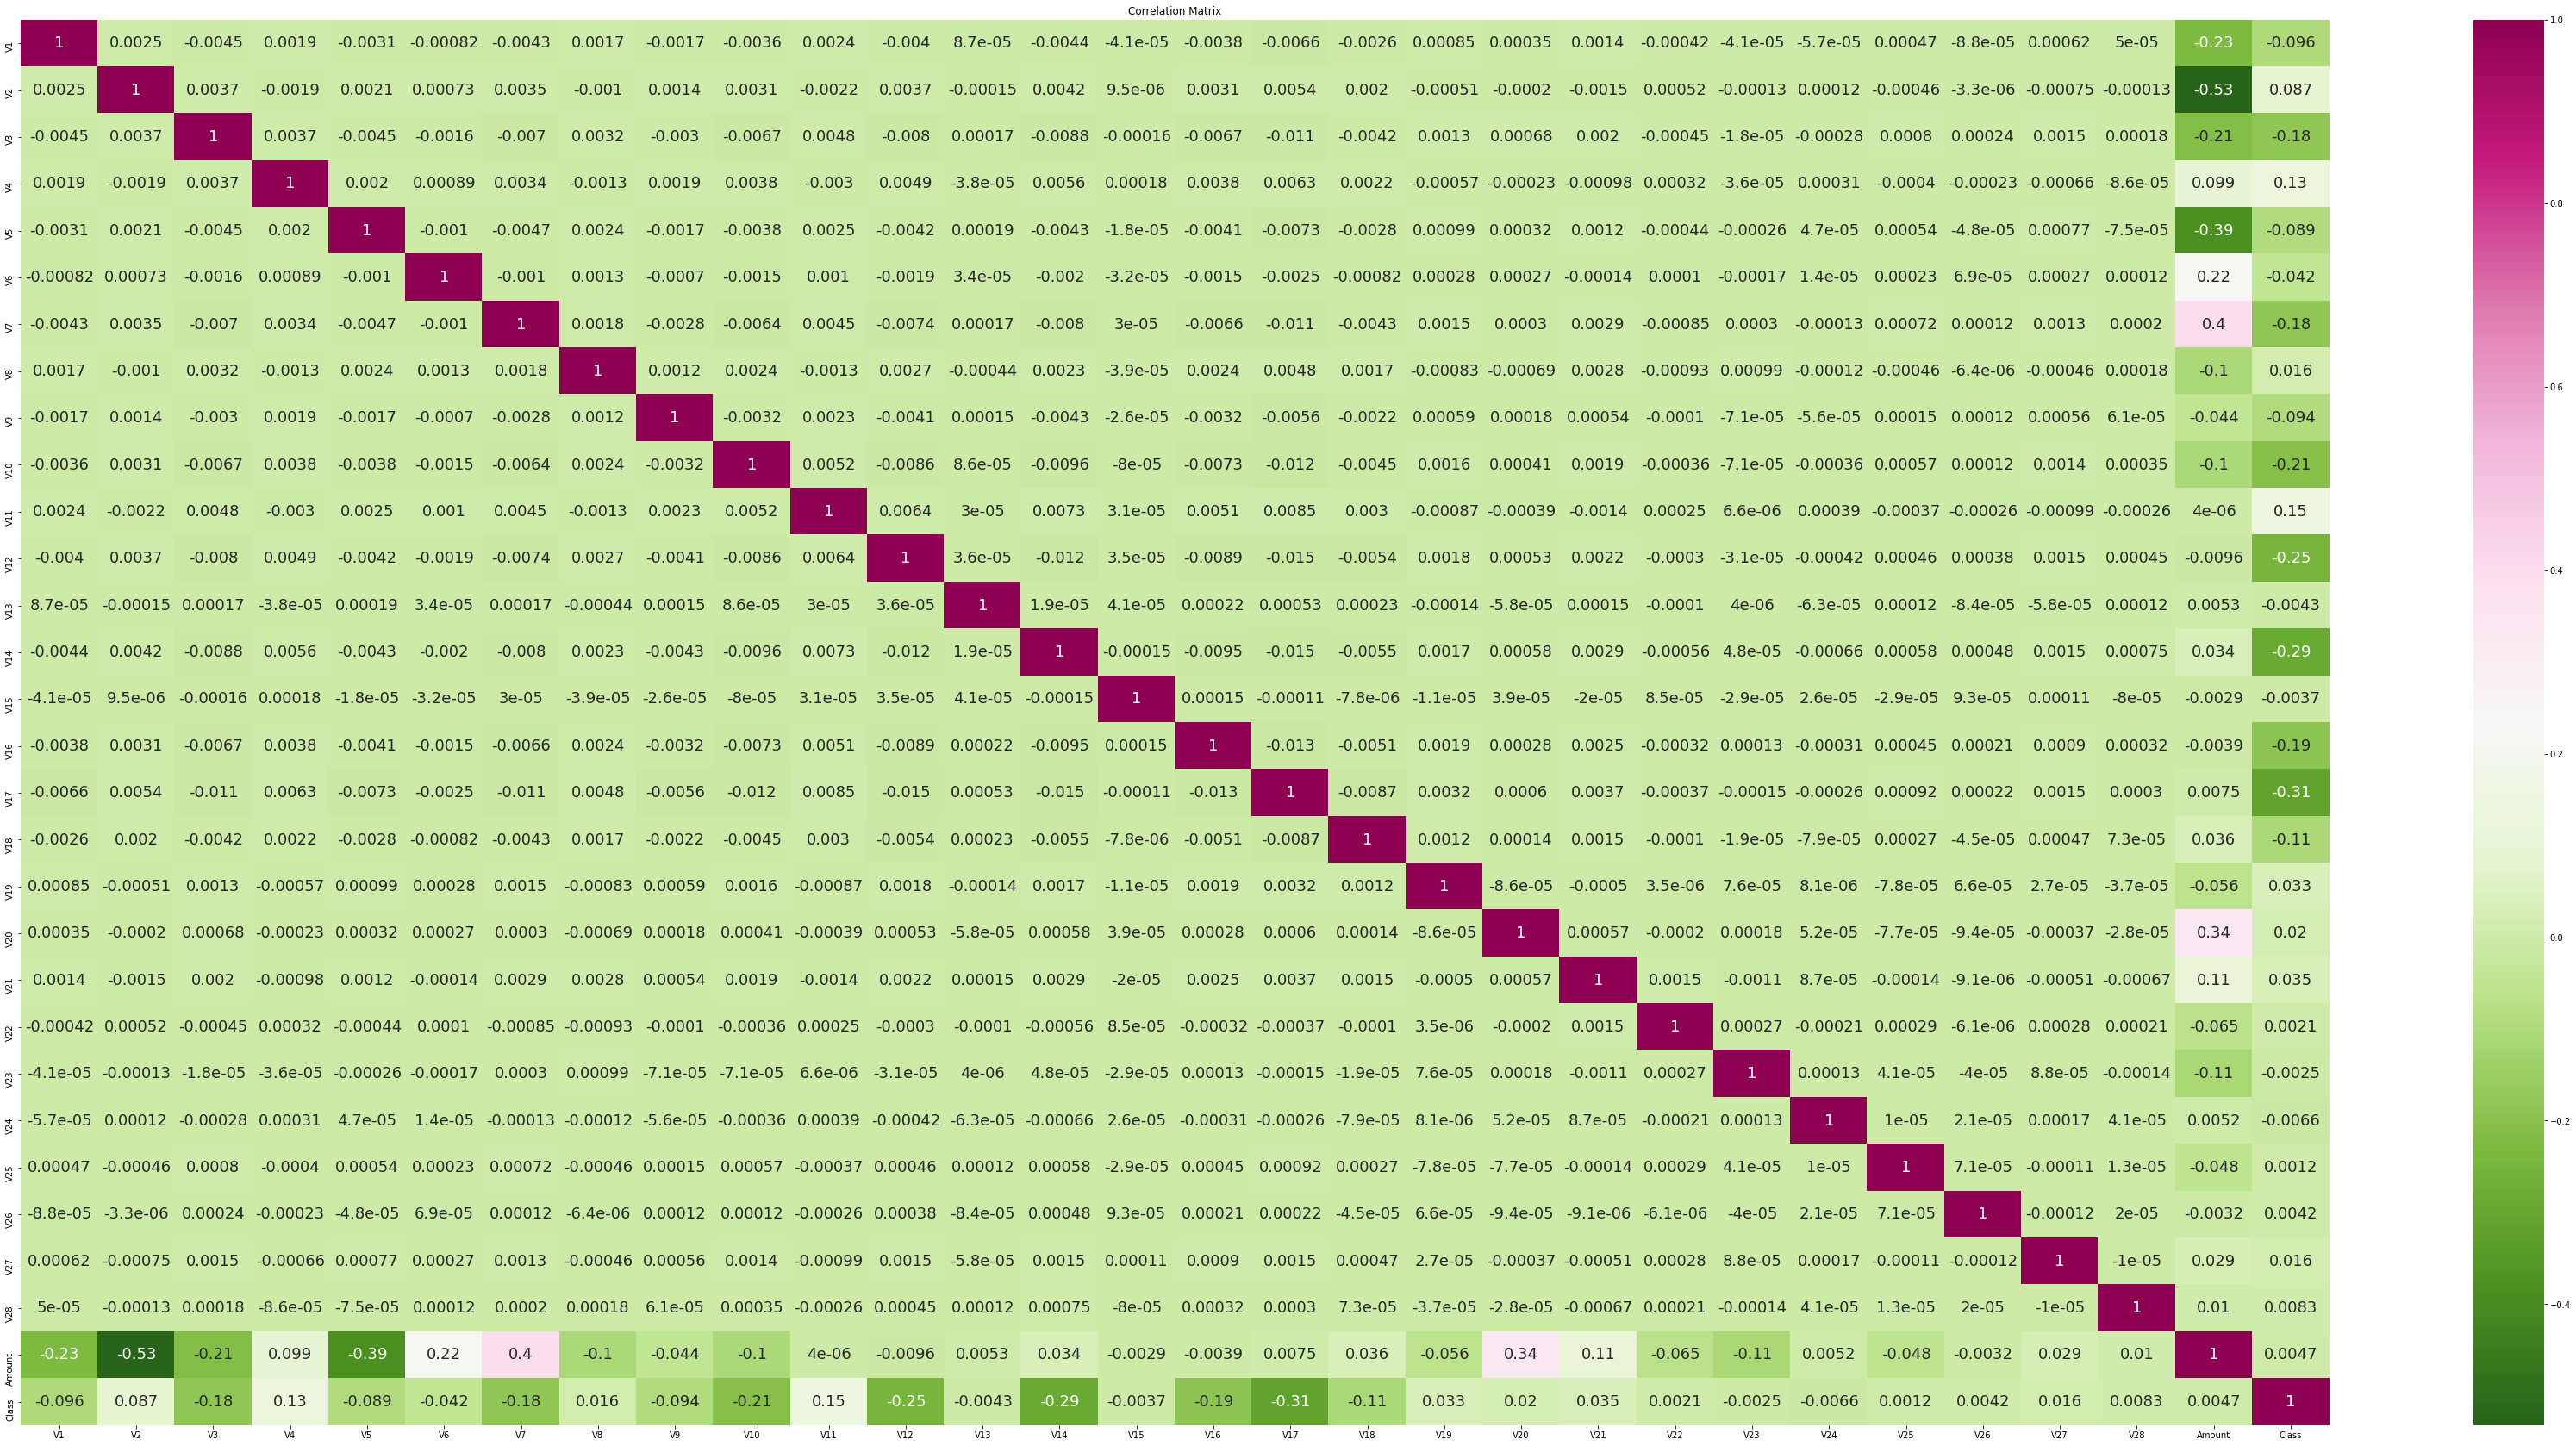

In [ ]:
plt.figure(figsize=(60, 30))
sns.heatmap(corr, annot = True,cmap="PiYG_r",annot_kws={"size": 18})
# specify name of the plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
ip,op=smt.fit_sample(data,data.Class)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ip=pd.DataFrame(ip)

In [ ]:
ip.columns=data.columns

In [ ]:
ip.shape,data.shape

((568028, 30), (284455, 30))

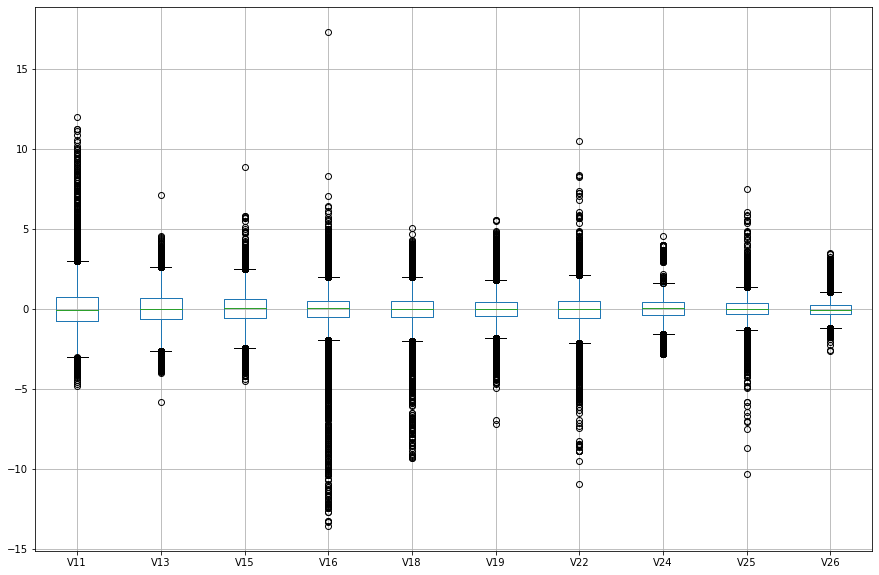

In [ ]:
plt.figure(figsize=(15,10))
data.boxplot(['V11','V13','V15', 'V16','V18', 'V19','V22','V24','V25', 'V26'])
plt.show()

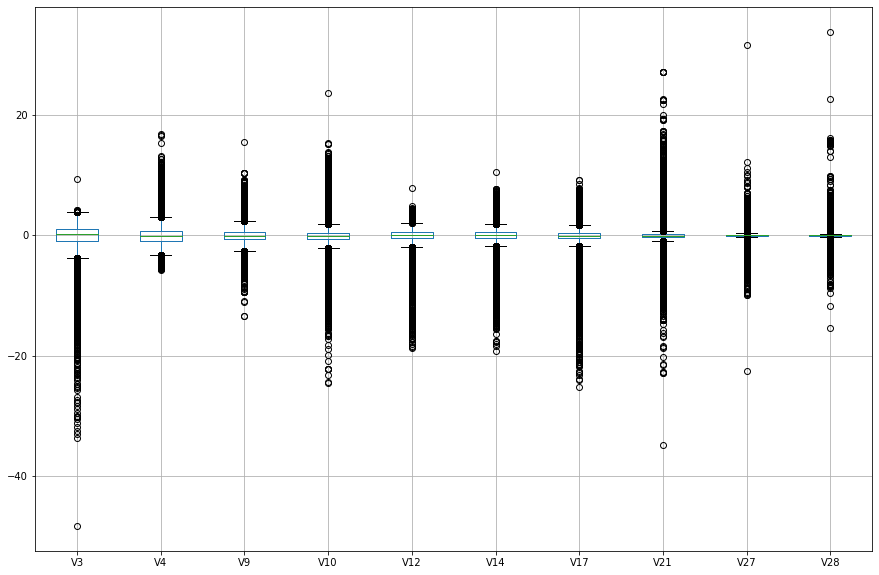

In [ ]:
plt.figure(figsize=(15,10))
data.boxplot(['V3','V4', 'V9', 'V10','V12' ,'V14','V17', 'V21','V27','V28'])
plt.show()


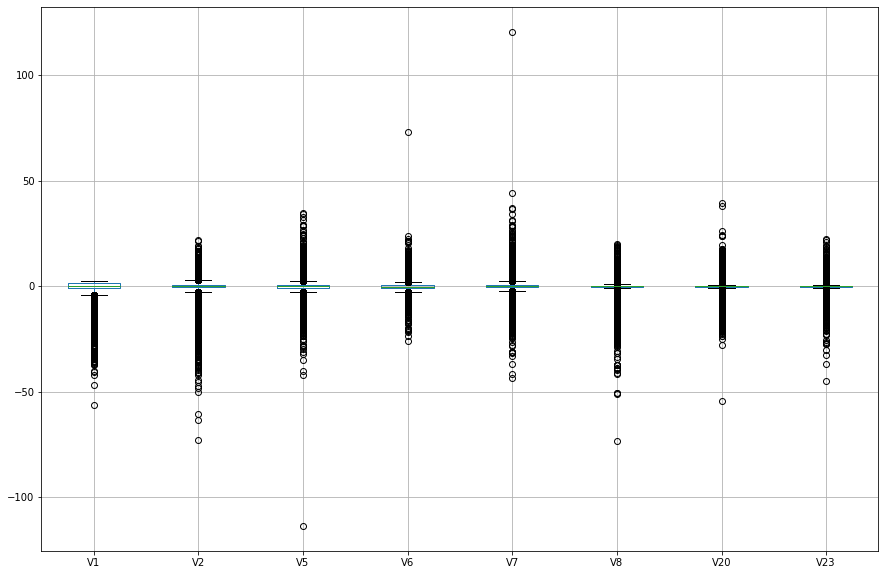

In [ ]:
plt.figure(figsize=(15,10))
data.boxplot(['V1','V2','V5','V6','V7','V8','V20','V23'])
plt.show()

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(ip))
print(z)

[[0.83765109 0.82185556 0.24250744 ... 0.2545292  0.11459646 1.        ]
 [0.65927051 0.47147528 0.6476798  ... 0.07608924 0.41674513 1.        ]
 [0.69393378 0.49268505 0.48236245 ... 0.02025536 0.37733444 1.        ]
 ...
 [0.50403021 0.74264706 0.85657697 ... 0.9064848  0.41831003 1.        ]
 [1.10439554 0.23672478 0.68566626 ... 0.03168362 0.40086909 1.        ]
 [0.14517071 0.48064385 0.47815692 ... 1.93414835 0.41905658 1.        ]]


In [ ]:
z.shape

(568028, 30)

In [ ]:
threshold = 3
print(np.where(z > 3))

(array([    21,     27,     74, ..., 568005, 568010, 568023]), array([27, 25,  8, ..., 17, 14, 15]))


In [ ]:
data = ip[(z < 3).all(axis=1)]

In [ ]:
data.shape

(487038, 30)

In [ ]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,1.607283,-0.780267,-0.294928,1.236719,-0.135565,-0.832677,-1.400205,0.807960,-0.670317,-0.044106,-0.292081,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.750000,0.0
1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,-0.209865,0.188511,0.674525,0.712608,0.122319,1.038024,0.128638,-0.222614,-0.687546,-0.056504,-0.040015,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.380000,0.0
2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,0.210249,-0.033777,-0.001594,1.767471,-1.212943,0.427684,1.252714,0.843412,-1.534474,0.830734,0.207653,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.950000,0.0
3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,-0.061757,-0.959725,0.408746,0.597641,-0.802430,-1.889520,-1.607785,-0.401475,0.729773,-2.445693,-0.461062,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.040000,0.0
4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,-0.842826,0.663538,0.624657,0.107262,-0.073654,-0.305506,0.618642,-0.952529,0.757618,-0.375461,0.353355,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568022,-4.402618,4.968191,-10.569865,6.897958,-9.346832,0.595869,-6.886844,4.112740,-3.872633,-9.967869,7.791427,-11.629373,1.094928,-10.060634,0.165979,-8.872009,-14.465830,-5.194817,2.490676,0.159738,1.819563,0.732780,0.984707,-0.382771,-1.036569,0.073823,0.527429,-0.057437,782.104929,1.0
568024,-4.341698,3.608128,-4.827292,3.876991,-2.870771,-0.881772,-5.431524,0.564203,-2.534153,-5.645386,3.581363,-6.676382,-1.108291,-7.327732,0.564974,-6.663258,-8.795428,-4.568266,0.770886,-0.267259,2.652282,-0.076716,0.262962,-0.131127,-0.237266,-0.198083,-0.004222,0.014551,0.955197,1.0
568025,-5.025591,4.480916,-8.690654,7.730710,-1.374161,-2.136583,-4.073945,0.822577,-1.513875,-2.270052,4.276078,-8.554433,-1.114808,-13.325292,1.192820,-4.223001,-5.549768,-1.223127,1.058293,-0.177246,0.559356,0.635633,0.517588,-0.626971,-0.249042,0.379527,-2.688096,0.409643,1.000000,1.0
568026,-8.279111,2.656470,-7.645058,6.371879,-4.419260,-0.848462,-9.377426,1.301182,-4.237793,-8.024466,5.111939,-8.403680,-1.464456,-8.521710,-0.212606,-7.361196,-12.672606,-4.671354,2.710011,-0.278163,-0.119471,0.415098,-0.153476,-0.445584,0.038448,0.161301,0.390519,0.026265,5.235140,1.0


In [ ]:
y = data.Class.values

In [ ]:
data.drop('Class',axis=1,inplace=True)
x=data

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names=data.columns
x[col_names] = scaler.fit_transform(x.values)
x

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.129474,-1.106037,0.013942,-1.212624,0.014283,-0.654572,0.437388,-0.639329,-0.639265,1.160296,-0.996456,0.565519,1.366187,0.683158,-0.978372,-0.001699,0.673644,-0.012762,-0.240840,-0.717924,-0.354790,0.776963,-0.113097,0.218439,0.680969,0.193954,-0.300359,-0.439106,-0.062514
1,0.790221,-0.485815,0.694049,-0.650105,-0.035205,-0.524584,0.473814,-0.428507,0.631748,0.565347,-0.563565,0.840997,0.823515,0.747494,1.181852,0.578127,0.441682,-0.022474,-0.251854,-0.244757,-0.473700,-0.300333,0.234203,1.673513,0.358315,2.150497,-0.360028,-0.165098,-0.556880
2,0.856145,-0.523359,0.416554,-0.916162,0.211152,-0.408416,0.483632,-0.501162,-0.269463,0.702896,-0.662892,0.648872,1.915736,0.414379,0.477051,1.004441,0.681624,-0.499918,0.536387,0.220153,-0.671043,-1.108108,0.040650,-0.220476,0.977834,-1.116244,-0.207395,-0.079361,-0.492398
3,0.017883,-0.718559,1.138518,-0.964261,0.410872,-0.396452,0.560104,-0.400862,0.084295,0.613839,-1.076645,0.765474,0.704476,0.516792,-2.198780,-0.080425,0.401424,0.776519,-2.374461,-1.035127,-0.759704,-0.398839,-0.066712,1.451891,-0.043650,-1.771500,-0.275879,-0.439054,-0.512005
4,-0.067883,-0.410779,1.132056,-0.598687,0.241768,1.146822,0.727174,-0.045015,0.298019,0.358110,-0.351303,0.826827,0.196730,0.698604,-0.369612,0.763964,0.277392,0.792217,-0.535223,0.493659,-0.191890,0.005625,0.335604,1.371703,0.897364,-1.809068,-0.154897,0.147485,0.612969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568022,-1.203570,1.902535,-2.346548,2.054007,-3.706934,0.912333,-1.940147,2.164474,-1.791692,-2.629506,2.833740,-2.655260,1.219375,-1.792904,0.174843,-2.835438,-2.764188,-2.563384,2.011115,0.130209,1.984447,1.099845,2.419270,-0.628952,-2.121071,0.123265,0.792928,-0.411436,4.703636
568024,-1.182190,1.234931,-0.770935,0.869064,-0.949501,-0.187810,-1.432241,0.077700,-0.980913,-1.214289,0.952505,-1.247825,-1.061872,-1.111111,0.635589,-1.997752,-1.487891,-2.210175,0.483217,-0.671330,3.061201,-0.138498,0.678048,-0.134904,-0.543676,-0.514322,-0.218325,-0.140927,-0.559743
568025,-1.422198,1.663350,-1.830942,2.380646,-0.312261,-1.122051,-0.958446,0.229640,-0.362884,-0.109176,1.262933,-1.781489,-1.068620,-2.607356,1.360605,-1.072266,-0.757356,-0.324401,0.738555,-0.502362,0.354925,0.951232,1.292338,-1.108385,-0.566914,0.840104,-5.323320,1.343718,-0.559441
568026,-2.564001,0.767797,-1.544057,1.847658,-1.608830,-0.163011,-2.809359,0.511092,-2.012886,-1.993219,1.636431,-1.738652,-1.430649,-1.408980,-0.262334,-2.262451,-2.360568,-2.268289,2.205978,-0.691798,-0.522837,0.613865,-0.326617,-0.752273,0.000436,0.328389,0.532511,-0.096910,-0.530904


In [ ]:
x.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05,4.870380e+05
mean,5.069871e-15,2.098284e-14,-3.355713e-15,4.307577e-15,1.438855e-15,-3.086835e-15,-1.397589e-14,2.808913e-15,1.873635e-14,2.479365e-16,-4.106660e-15,-6.949731e-15,1.597928e-15,9.302770e-16,-8.085805e-17,-2.308039e-14,-8.826438e-15,-1.041529e-15,-2.513828e-15,-3.296624e-16,-9.405155e-15,-3.156252e-18,1.015408e-15,3.493775e-15,-3.310468e-16,-1.531972e-15,-1.038044e-16,-2.635666e-15,-1.109624e-13
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-5.966841e+00,-4.952788e+00,-5.185174e+00,-2.880812e+00,-5.648387e+00,-3.762382e+00,-6.222255e+00,-7.993688e+00,-4.296934e+00,-4.651958e+00,-2.457463e+00,-4.033415e+00,-3.027589e+00,-3.108709e+00,-3.276537e+00,-4.092342e+00,-4.174608e+00,-4.205629e+00,-3.118038e+00,-5.458942e+00,-9.562841e+00,-4.952884e+00,-7.424333e+00,-3.141894e+00,-3.717053e+00,-3.124185e+00,-5.612033e+00,-4.654605e+00,-5.661787e-01
25%,-2.997513e-01,-6.139400e-01,-4.751430e-01,-7.365869e-01,-2.415022e-01,-5.037068e-01,-2.463600e-01,-3.418385e-01,-5.454875e-01,-5.561029e-01,-7.584494e-01,-5.591422e-01,-7.233315e-01,-6.804500e-01,-6.299455e-01,-4.245301e-01,-4.019606e-01,-3.306630e-01,-5.890135e-01,-5.076201e-01,-5.491597e-01,-7.546494e-01,-4.292405e-01,-6.266279e-01,-6.234575e-01,-6.896395e-01,-3.084677e-01,-3.681005e-01,-5.536408e-01
50%,1.608748e-01,-1.368538e-01,2.645715e-01,-2.141507e-01,1.467331e-01,6.680673e-03,2.974429e-01,-1.664032e-01,1.855439e-01,4.119770e-01,-2.429571e-01,4.693550e-01,-2.171311e-02,5.206250e-01,4.054490e-02,3.630023e-01,3.969094e-01,2.263038e-01,-5.385943e-02,-1.413805e-01,-1.731590e-01,-2.628227e-02,-5.043389e-02,5.599192e-02,1.652159e-02,-6.119068e-02,-1.222674e-01,-7.010672e-02,-4.392421e-01
75%,7.307903e-01,4.663385e-01,6.749390e-01,6.500833e-01,4.993871e-01,4.726345e-01,5.662196e-01,1.671674e-01,6.502955e-01,6.441329e-01,6.241512e-01,7.238238e-01,6.888530e-01,7.536084e-01,7.091381e-01,6.618893e-01,5.582974e-01,5.884051e-01,5.496777e-01,4.255199e-01,3.324107e-01,7.413489e-01,3.911443e-01,7.060059e-01,6.596532e-01,5.983950e-01,5.007219e-01,4.753151e-01,1.067766e-01
max,1.203044e+00,5.502813e+00,1.702574e+00,3.525121e+00,4.792407e+00,3.658725e+00,2.264307e+00,6.862137e+00,3.830295e+00,3.818386e+00,3.777874e+00,1.876342e+00,3.064238e+00,2.635997e+00,3.164689e+00,2.101571e+00,2.413569e+00,2.732579e+00,3.297170e+00,5.862412e+00,9.979318e+00,4.711636e+00,7.419871e+00,2.846375e+00,3.639388e+00,3.143317e+00,4.268992e+00,4.557488e+00,5.033091e+00


In [ ]:
x=np.matrix(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((413982, 29), (73056, 29), (413982,), (73056,))

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential()

In [ ]:
y_train=keras.utils.to_categorical(y_train,2)
y_test=keras.utils.to_categorical(y_test,2)

In [ ]:
model.add(Dense(units=64,activation='relu',input_shape=(29,)))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.2))




model.add(Dense(units=2,activation='softmax'))

In [ ]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
my_model=model.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
12937/12937 [==============================] - 20s 1ms/step - loss: 0.1277 - accuracy: 0.9589 - val_loss: 0.0102 - val_accuracy: 0.9976
Epoch 2/20
12937/12937 [==============================] - 19s 1ms/step - loss: 0.0312 - accuracy: 0.9916 - val_loss: 0.0073 - val_accuracy: 0.9987
Epoch 3/20
12937/12937 [==============================] - 19s 1ms/step - loss: 0.0278 - accuracy: 0.9928 - val_loss: 0.0058 - val_accuracy: 0.9988
Epoch 4/20
12937/12937 [==============================] - 19s 1ms/step - loss: 0.0273 - accuracy: 0.9930 - val_loss: 0.0055 - val_accuracy: 0.9991
Epoch 5/20
12937/12937 [==============================] - 18s 1ms/step - loss: 0.0263 - accuracy: 0.9935 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 6/20
12937/12937 [==============================] - 20s 2ms/step - loss: 0.0244 - accuracy: 0.9938 - val_loss: 0.0049 - val_accuracy: 0.9991
Epoch 7/20
12937/12937 [==============================] - 19s 2ms/step - loss: 0.0247 - accuracy: 0.9938 - val_loss: 0

In [ ]:
model.save('credit_card.hdf5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1920      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 68        
_________________________________________________________________
dropout_12 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                

In [ ]:
model.evaluate(x_test,y_test,batch_size=32)


2283/2283 [==============================] - 3s 1ms/step - loss: 0.0030 - accuracy: 0.9996


[0.0029914192855358124, 0.9995893836021423]

In [ ]:
Y_pred1=model.predict(x_train)
Y_pred2=model.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score,roc_auc_score,f1_score

#printing errors of test data
print('test Recall Score:', recall_score(y_train.argmax(axis=1),Y_pred1.argmax(axis=1)))
print('test Recall Score:', recall_score(y_test.argmax(axis=1),Y_pred2.argmax(axis=1)))

print('train Precission score',precision_score(y_train.argmax(axis=1),Y_pred1.argmax(axis=1)))
print('test Precission score',precision_score(y_test.argmax(axis=1),Y_pred2.argmax(axis=1)))

print('train f1 score',f1_score(y_train.argmax(axis=1),Y_pred1.argmax(axis=1)))
print('test f1 score',f1_score(y_test.argmax(axis=1),Y_pred2.argmax(axis=1)))



test Recall Score: 0.9976732023353364
test Recall Score: 0.9971845483167837
train Precission score 0.9992089537879355
test Precission score 0.999120359136132
train f1 score 0.9984404875078776
test f1 score 0.998151515151515


In [ ]:
test=pd.read_csv('TEST.csv')

In [ ]:
test.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,1.755477,-0.860198,-1.629185,0.164162,0.027778,-0.330613,0.216770,-0.215280,1.187584,-0.291611,-1.883296,0.107464,-0.180398,0.138906,-0.105876,-0.229330,-0.401810,-0.330877,0.620971,0.135129,-0.122173,-0.503867,-0.063954,-1.047319,-0.016514,-0.039022,-0.058861,-0.035955,186.76
1,1,-0.706506,1.155627,1.132585,2.742101,1.203095,0.013641,1.200743,-0.273633,-1.323403,1.138185,-1.275816,-1.087457,-0.936612,-0.041733,-1.153523,0.551025,-0.829644,-0.069660,-1.874384,-0.281283,0.352723,1.142657,-0.156382,1.139391,-0.151635,0.063306,-0.284146,-0.015198,21.18
2,2,1.043717,-0.928666,0.643312,-2.093695,-0.527878,1.420413,-1.053914,0.702897,2.450726,-1.767777,2.057099,2.184425,-0.470463,-0.016315,1.027377,-2.374469,1.332018,-1.536175,0.206623,-0.264045,0.008873,0.568767,0.070359,-0.978165,0.258814,-0.726163,0.176843,0.005530,1.00
3,3,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,-7.524368,2.954344,-7.099825,1.520369,-7.687803,-0.225002,-8.520850,-13.277300,-5.253705,3.623332,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46
4,4,1.187587,0.173589,0.104741,1.143172,0.164552,0.162763,0.097302,0.001023,-0.013501,0.060962,0.318420,1.224034,0.632704,0.053400,-1.059099,-0.023212,-0.603919,0.155364,0.580959,-0.039666,-0.112873,-0.163529,-0.231334,-0.469322,0.832111,-0.312343,0.019521,0.005464,27.00


In [ ]:
test.describe()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,175.500000,-0.629311,0.655383,-1.030421,0.640944,-0.478498,-0.150092,-0.768245,0.218073,-0.407894,-0.766239,0.540558,-0.818782,-0.096586,-1.057530,-0.042562,-0.574854,-1.019522,-0.378634,0.093641,0.023207,0.138486,0.040470,-0.021977,-0.014708,0.041112,-0.022706,0.029782,0.022379,80.246960
std,101.757883,3.396727,2.275544,3.878978,2.321323,2.442701,1.412766,3.032162,2.839402,1.586249,2.689941,1.990727,2.992378,0.955657,3.235804,0.937264,2.284040,3.597554,1.555352,0.946165,0.631356,1.616580,0.877218,0.614634,0.608197,0.523694,0.469408,0.507216,0.292173,198.226017
min,0.000000,-25.266355,-5.509420,-26.823673,-3.417752,-18.664251,-4.647403,-18.750889,-37.353443,-7.570322,-14.676470,-2.520906,-17.631606,-2.703355,-18.822087,-3.792233,-14.129855,-22.608868,-9.498746,-3.286150,-3.493050,-4.478904,-8.887017,-7.474414,-1.740473,-2.174441,-1.149923,-2.649107,-1.495006,0.000000
25%,87.750000,-1.088560,-0.452593,-1.486050,-0.725555,-0.926290,-0.838780,-0.835422,-0.193543,-1.099329,-0.852715,-0.610906,-0.728845,-0.789626,-0.847898,-0.631652,-0.697671,-0.715239,-0.716737,-0.463058,-0.221784,-0.162011,-0.478794,-0.152956,-0.379167,-0.287432,-0.353846,-0.066621,-0.054605,4.705000
50%,175.500000,-0.197125,0.282176,-0.041672,0.280634,-0.162771,-0.298209,-0.086058,0.075408,-0.247424,-0.172042,0.203476,0.039201,-0.054290,-0.063915,0.012945,-0.018087,-0.176892,-0.069198,0.000759,-0.079650,0.020377,0.113676,-0.015198,0.031111,0.071322,-0.110468,0.010220,0.014339,20.175000
75%,263.250000,1.234296,1.089552,0.907947,1.313671,0.570860,0.331407,0.491083,0.488854,0.394724,0.426120,1.078383,0.565430,0.490930,0.430465,0.589157,0.544975,0.331527,0.404648,0.572908,0.161270,0.235741,0.582621,0.111144,0.438485,0.367997,0.275736,0.134319,0.106570,65.140000
max,351.000000,2.321966,14.323254,2.875973,11.805469,3.738853,5.760059,5.802537,16.633103,4.601958,6.438808,11.669205,2.277620,3.057814,2.435745,2.929704,2.464450,6.509272,3.077014,5.228342,3.209171,27.202839,2.194378,5.303607,1.249015,1.768192,2.062122,2.262942,1.521218,1762.200000


In [ ]:
test.drop('Index',axis=1,inplace=True)

In [ ]:
test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.755477,-0.860198,-1.629185,0.164162,0.027778,-0.330613,0.216770,-0.215280,1.187584,-0.291611,-1.883296,0.107464,-0.180398,0.138906,-0.105876,-0.229330,-0.401810,-0.330877,0.620971,0.135129,-0.122173,-0.503867,-0.063954,-1.047319,-0.016514,-0.039022,-0.058861,-0.035955,186.76
1,-0.706506,1.155627,1.132585,2.742101,1.203095,0.013641,1.200743,-0.273633,-1.323403,1.138185,-1.275816,-1.087457,-0.936612,-0.041733,-1.153523,0.551025,-0.829644,-0.069660,-1.874384,-0.281283,0.352723,1.142657,-0.156382,1.139391,-0.151635,0.063306,-0.284146,-0.015198,21.18
2,1.043717,-0.928666,0.643312,-2.093695,-0.527878,1.420413,-1.053914,0.702897,2.450726,-1.767777,2.057099,2.184425,-0.470463,-0.016315,1.027377,-2.374469,1.332018,-1.536175,0.206623,-0.264045,0.008873,0.568767,0.070359,-0.978165,0.258814,-0.726163,0.176843,0.005530,1.00
3,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,-7.524368,2.954344,-7.099825,1.520369,-7.687803,-0.225002,-8.520850,-13.277300,-5.253705,3.623332,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46
4,1.187587,0.173589,0.104741,1.143172,0.164552,0.162763,0.097302,0.001023,-0.013501,0.060962,0.318420,1.224034,0.632704,0.053400,-1.059099,-0.023212,-0.603919,0.155364,0.580959,-0.039666,-0.112873,-0.163529,-0.231334,-0.469322,0.832111,-0.312343,0.019521,0.005464,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,-2.740483,3.658095,-4.110636,5.340242,-2.666775,-0.092782,-4.388699,-0.280133,-2.821895,-4.466284,3.969800,-7.346717,-1.163312,-8.225569,0.825002,-6.772867,-8.815785,-4.568859,1.126599,0.185325,2.417495,-0.097712,0.382155,-0.154757,-0.403956,0.277895,0.830062,0.218690,112.33
348,1.996699,0.022006,-1.577423,0.281773,0.472021,-0.183526,-0.131080,-0.044925,0.325681,-0.334861,1.036165,1.209054,1.154979,-1.255781,-0.346951,0.804158,0.096727,0.662578,0.186063,-0.013068,-0.074329,-0.092318,0.151294,0.231576,-0.157721,0.376819,-0.042319,-0.030305,20.71
349,-0.626910,1.574059,0.518148,3.350490,0.840725,0.540113,0.772164,0.493990,-2.406775,0.855991,0.007051,0.447769,0.400501,0.653357,-1.669684,0.492993,-0.467006,-0.029953,0.062356,-0.036845,-0.004328,-0.223672,0.093403,-0.439572,-0.597478,-0.163450,0.037360,0.107155,47.73
350,-0.262802,0.971561,0.107488,-0.642781,0.369554,-0.925605,1.187334,-0.236083,0.026680,-0.161179,-0.781647,0.538015,0.790118,-0.111076,-0.409769,-0.170284,-0.437303,-0.916822,-0.166333,0.142667,-0.283814,-0.518704,0.129107,-0.073293,-0.403226,0.151587,0.377947,0.153047,44.99


In [ ]:
test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,-0.629311,0.655383,-1.030421,0.640944,-0.478498,-0.150092,-0.768245,0.218073,-0.407894,-0.766239,0.540558,-0.818782,-0.096586,-1.057530,-0.042562,-0.574854,-1.019522,-0.378634,0.093641,0.023207,0.138486,0.040470,-0.021977,-0.014708,0.041112,-0.022706,0.029782,0.022379,80.246960
std,3.396727,2.275544,3.878978,2.321323,2.442701,1.412766,3.032162,2.839402,1.586249,2.689941,1.990727,2.992378,0.955657,3.235804,0.937264,2.284040,3.597554,1.555352,0.946165,0.631356,1.616580,0.877218,0.614634,0.608197,0.523694,0.469408,0.507216,0.292173,198.226017
min,-25.266355,-5.509420,-26.823673,-3.417752,-18.664251,-4.647403,-18.750889,-37.353443,-7.570322,-14.676470,-2.520906,-17.631606,-2.703355,-18.822087,-3.792233,-14.129855,-22.608868,-9.498746,-3.286150,-3.493050,-4.478904,-8.887017,-7.474414,-1.740473,-2.174441,-1.149923,-2.649107,-1.495006,0.000000
25%,-1.088560,-0.452593,-1.486050,-0.725555,-0.926290,-0.838780,-0.835422,-0.193543,-1.099329,-0.852715,-0.610906,-0.728845,-0.789626,-0.847898,-0.631652,-0.697671,-0.715239,-0.716737,-0.463058,-0.221784,-0.162011,-0.478794,-0.152956,-0.379167,-0.287432,-0.353846,-0.066621,-0.054605,4.705000
50%,-0.197125,0.282176,-0.041672,0.280634,-0.162771,-0.298209,-0.086058,0.075408,-0.247424,-0.172042,0.203476,0.039201,-0.054290,-0.063915,0.012945,-0.018087,-0.176892,-0.069198,0.000759,-0.079650,0.020377,0.113676,-0.015198,0.031111,0.071322,-0.110468,0.010220,0.014339,20.175000
75%,1.234296,1.089552,0.907947,1.313671,0.570860,0.331407,0.491083,0.488854,0.394724,0.426120,1.078383,0.565430,0.490930,0.430465,0.589157,0.544975,0.331527,0.404648,0.572908,0.161270,0.235741,0.582621,0.111144,0.438485,0.367997,0.275736,0.134319,0.106570,65.140000
max,2.321966,14.323254,2.875973,11.805469,3.738853,5.760059,5.802537,16.633103,4.601958,6.438808,11.669205,2.277620,3.057814,2.435745,2.929704,2.464450,6.509272,3.077014,5.228342,3.209171,27.202839,2.194378,5.303607,1.249015,1.768192,2.062122,2.262942,1.521218,1762.200000


In [ ]:
test=np.matrix(test)

In [ ]:
test

matrix([[ 1.75547677e+00, -8.60198000e-01, -1.62918498e+00, ...,
         -5.88609462e-02, -3.59552725e-02,  1.86760000e+02],
        [-7.06506193e-01,  1.15562682e+00,  1.13258459e+00, ...,
         -2.84145738e-01, -1.51975990e-02,  2.11800000e+01],
        [ 1.04371749e+00, -9.28666229e-01,  6.43311641e-01, ...,
          1.76842867e-01,  5.53015816e-03,  1.00000000e+00],
        ...,
        [-6.26909533e-01,  1.57405934e+00,  5.18147660e-01, ...,
          3.73602118e-02,  1.07155387e-01,  4.77300000e+01],
        [-2.62802287e-01,  9.71561156e-01,  1.07487744e-01, ...,
          3.77946970e-01,  1.53047267e-01,  4.49900000e+01],
        [ 1.34896444e+00, -5.21583710e-01,  5.55158394e-01, ...,
          1.50760735e-02,  1.72098587e-02,  7.95000000e+00]])

In [ ]:
answer=model.predict(test)

In [ ]:
len(answer)

352

In [ ]:
answer

array([[1.0000000e+00, 0.0000000e+00],
       [5.8778808e-02, 9.4122112e-01],
       [1.0000000e+00, 0.0000000e+00],
       [3.0971121e-03, 9.9690288e-01],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [3.0971121e-03, 9.9690288e-01],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [3.0971121e-03, 9.9690288e-01],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [5.8778808e-02, 9.4122112e-01],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [3.0971121e-03, 9.9690288e-01],
       [1.0000000e+00, 0.0000000e+00],
       [7.8404039e-01, 2.1595962e-01],
       [1.0000000e+00, 0.0000000e+00],
       [3.0971121e-03, 9.9690288e-01],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [3.0971121e-03, 9.

In [ ]:
class_list=[]
for i in range(len(answer)):
  class_list.append(np.argmax(answer[i]))
  

In [ ]:
test=pd.read_csv('TEST.csv')

In [ ]:
submis=pd.DataFrame()
submis['Index']=test['Index']
submis['Class']=class_list
submis

,Index,Class
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0
...,...,...
347,347,1
348,348,0
349,349,0
350,350,0


In [ ]:
submis.to_csv('credit.csv',index=False)